# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('sinasc_RO_2019.csv')
from IPython.display import IFrame
# Abrir arquivo PDF no Python
pdf_path = 'Estrutura_SINASC_para_CD.pdf'
# # 'Imprimir PDF no Notebook'
IFrame(pdf_path, width=800, height=400)

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

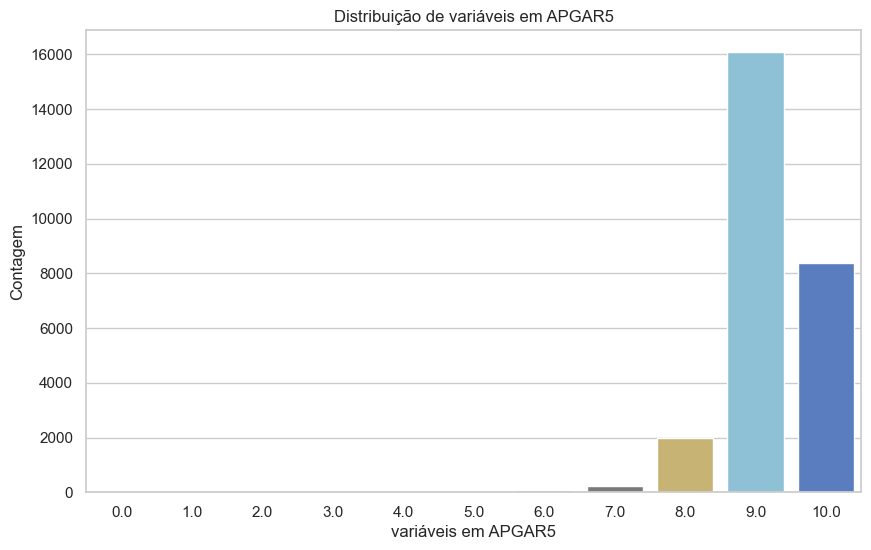

In [35]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='APGAR5', data=df, palette='muted')
plt.title('Distribuição de variáveis em APGAR5')
plt.xlabel('variáveis em APGAR5')
plt.ylabel('Contagem')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

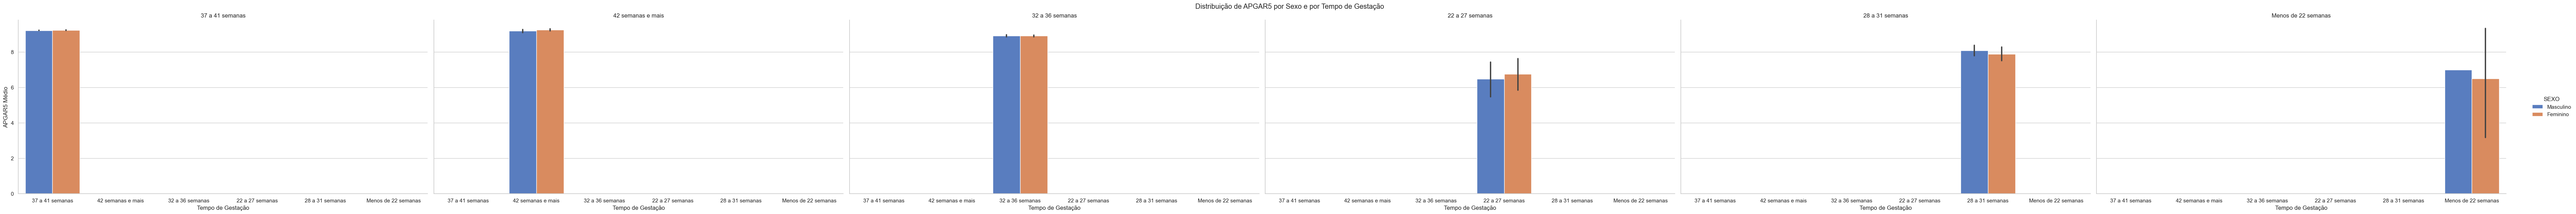

In [36]:
sns.set(style="whitegrid")
g = sns.catplot(
    x='GESTACAO', 
    y='APGAR5', 
    hue='SEXO', 
    data=df, 
    kind='bar', 
    height=6, 
    aspect=2, 
    palette='muted',
    col='GESTACAO' 
)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribuição de APGAR5 por Sexo e por Tempo de Gestação')
g.set_axis_labels('Tempo de Gestação', 'APGAR5 Médio')
g.set_titles("{col_name}")
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

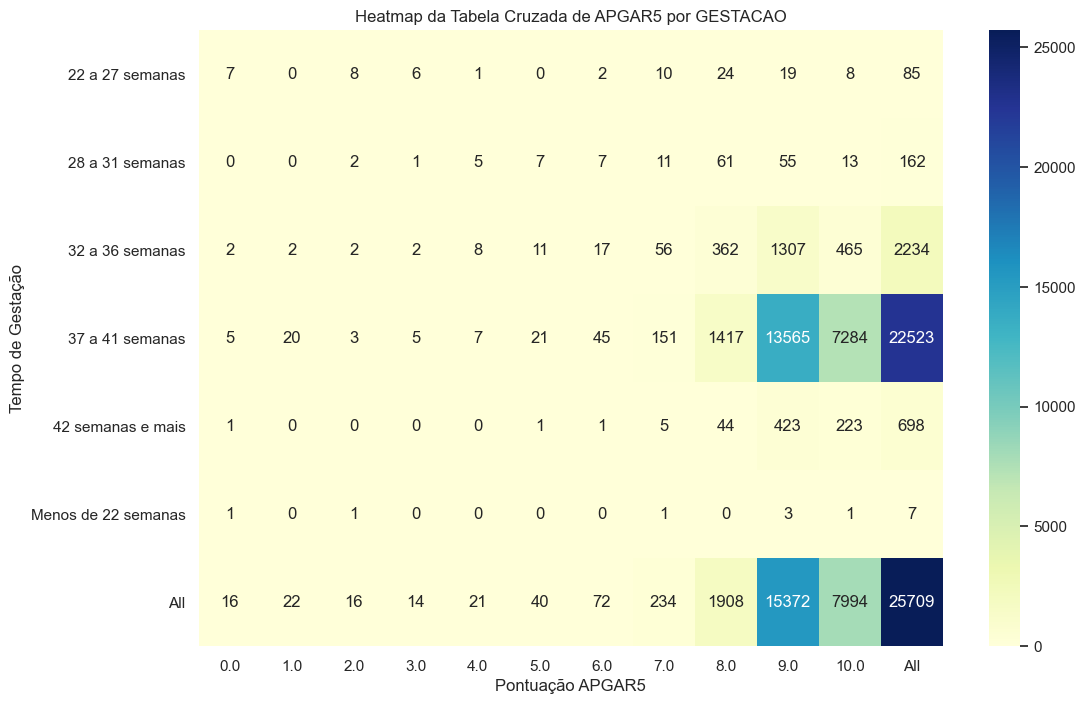

In [37]:
tabela_cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5'], margins=True)
plt.figure(figsize=(12, 8))
sns.heatmap(tabela_cruzada, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Heatmap da Tabela Cruzada de APGAR5 por GESTACAO')
plt.ylabel('Tempo de Gestação')
plt.xlabel('Pontuação APGAR5')
plt.show()

####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

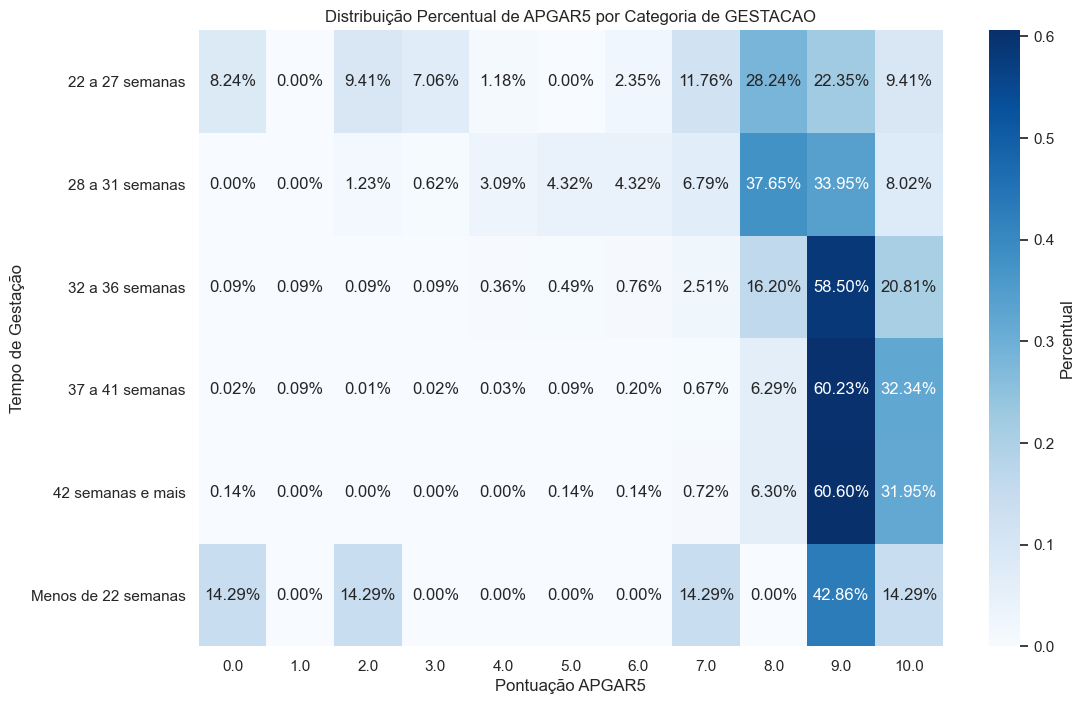

In [38]:
tabela_cruzada_percentual = pd.crosstab(df['GESTACAO'], df['APGAR5'], normalize='index')
plt.figure(figsize=(12, 8))
sns.heatmap(tabela_cruzada_percentual, annot=True, cmap="Blues", fmt=".2%", cbar_kws={'label': 'Percentual'})
plt.title('Distribuição Percentual de APGAR5 por Categoria de GESTACAO')
plt.ylabel('Tempo de Gestação')
plt.xlabel('Pontuação APGAR5')
plt.show()

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

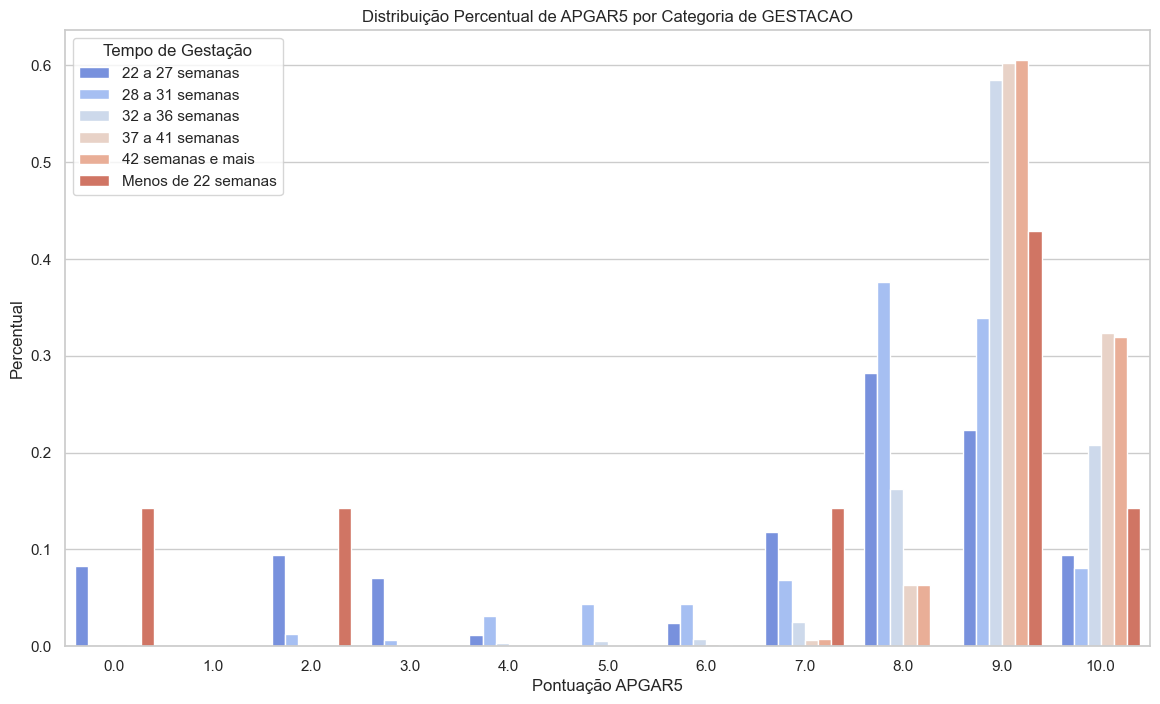

In [39]:
df_plot = tabela_cruzada_percentual.reset_index()
df_plot = df_plot.melt(id_vars=['GESTACAO'], var_name='APGAR5', value_name='Percentual')

plt.figure(figsize=(14, 8))
sns.barplot(x='APGAR5', y='Percentual', hue='GESTACAO', data=df_plot, palette='coolwarm')
plt.title('Distribuição Percentual de APGAR5 por Categoria de GESTACAO')
plt.xlabel('Pontuação APGAR5')
plt.ylabel('Percentual')
plt.legend(title='Tempo de Gestação')
plt.show()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Figure size 1000x600 with 0 Axes>

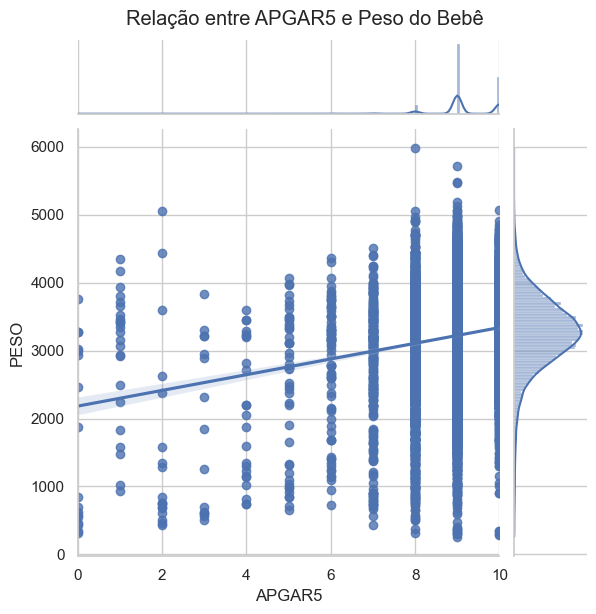

In [55]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='APGAR5', y='PESO', data=df, kind="reg", color="b")
plt.suptitle('Relação entre APGAR5 e Peso do Bebê', y=1.02)
plt.show()